**Modèles épidémiologiques**
-

**Bárbara Barsi Duarte Batista da Silva**

**Rafaela de Carvalho Machado Pinheiro**


--- 

## Contexte
Il s'agit de voir les différences entre le modèle markovien et le modèle déterministe de la diffusion d'une épidémie. Vous devez rendre un fichier unique soit en pdf, soit en ipynb.

## Ce que vous avez à faire
- Ecrire un code qui résout et affiche le système déterministe SIR, prenant en entrée les paramètres beta et gamma (voir poly) 
- qui simule l'évolution du processus de Markov pour une population de N individus avec les mêmes paramètres beta et gamma
- Trouver des couples de valeurs (beta,gamma) où
    - tout le monde est retiré sur le long terme
    - il y a une partie de la population qui reste susceptible et une autre qui est retirée
- Illustrer sur des graphiques la convergence du processus de Markov renormalisé vers la solution du système déterministe


### Markov Model

### SIR Model
The SIR model is widely used to estimate the spread of a disease through a population. In the model, the population is divided into 3 groups:
- $S$, susceptible: individuals who are not infected but can catch the disease. The size of this group can only decrease, as recovered/dead individuals are counted for in the "removed" group.
- $I$, infected: individuals who are currently infected and can transmit the disease to susceptibles. 
- $R$, removed: individuals who were infected and either recovered or died, meaning they do not transmit the disease anymore.

The deterministic SIR uses a system of Ordinary Differential Equations to show how these three groups evolve over time:  
  
The first equation models the change in the susceptible group, as they become infected after meeting infected individuals. This rate is also influenced by the transmission/infection rate of the disease, called $\beta$.
$$
\frac{dS}{dt} =  -\frac{\beta S I}{N}
$$

The second equation shows the change in the infected group. This group increases as more susceptibles are infected, but it decreases as the infected recover/die with rate $\gamma$
$$
\frac{dI}{dt} = \frac{\beta S I}{N}  - \gamma I
$$

The last equation models the change in the removed group, which increases as infected individuals recover or die at rate $\gamma$
$$
\frac{dR}{dt} = \gamma I
$$

The total population is $N$, thus $S+I+R=N$. Since we do not consider births or deaths unrelated to the disease, the population size remains constant.  
The initial value of $S$ is $N-I(0)$, as the whole population is susceptible except for infected individuals at first. Consequently, the initial value of $R$ is $0$.

The given dataset uses the total count of hospitalizations, deaths and recoveries, thus it is more intuitive to model the equations by dividing the total size of each group ($S,I, R$) then divide them by $N$. However, another possible notation would be to use them as fractions, with respect to the time $t$: $s(t)=S(t)/N \rightarrow ds/dt = -\beta s(t) i(t)$

First, we create a function to define the SIR system, using the equations above. We will use a list `y=[S(t), I(t), R(t)]` to simplify its parameters. Notice the `t` parameter and the `R` variables are not used directly in the function, they are stated to avoid conflicts when solving the ODEs.

In [1]:
def deriv_sir(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I/N
    dIdt = beta * S * I/N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

The following function sets the initial values for each group, then solves the ODEs system using the `odeint` function from the `Scipy` library. This returns the values of $S, I, R$ in a vector, which is then transposed and stored into the S, I and R variables.

In [9]:
from scipy.integrate import odeint
import numpy as np
def SIR(beta, gamma, N):
    I0 = 1
    S0 = N - I0
    R0 = 0
    # time points in days
    t = np.linspace(0, 100, 100)
    y = S0, I0, R0
    res = odeint(deriv_sir, y, t, args=(N, beta, gamma)) # solve ODEs
    S, I, R = res.T
    return S, I, R, t


In [10]:
# plot simulation results
import matplotlib.pyplot as plt
def plot_sir(S, I, R, t):
    plt.figure(figsize=(10, 6))
    plt.plot(t, S, label='Susceptible')
    plt.plot(t, I, label='Infected')
    plt.plot(t, R, label='Removed')
    plt.xlabel('Time (days)')
    plt.ylabel('Population')
    plt.title('SIR Model Simulation')
    plt.legend()
    plt.grid()
    plt.show()

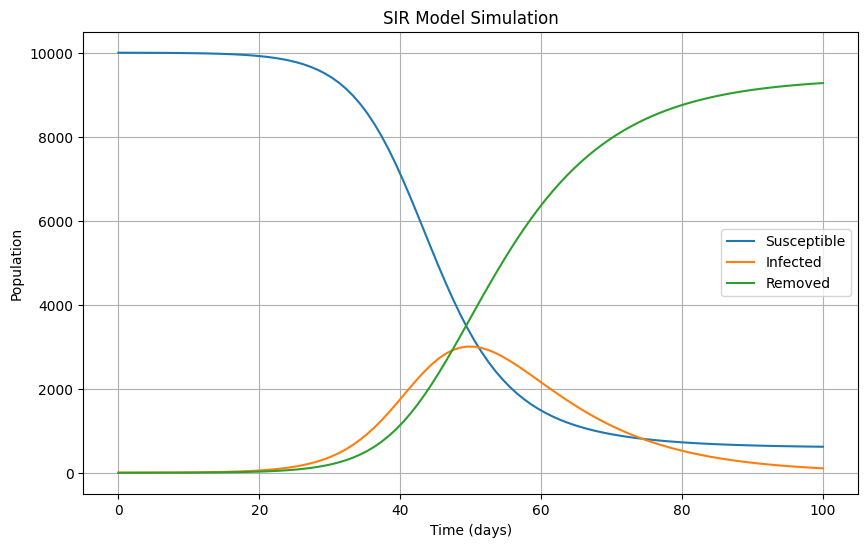

In [16]:
# run the simulation
beta = 0.3  # infection rate
gamma = 0.1  # recovery rate
N = 10000  # total population

S, I, R, t = SIR(beta, gamma, N)
plot_sir(S, I, R, t)

---

### Question ouverte avec différentes réponses possibles 
A partir des données de Santé Publique France, <https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/>, notamment le fichier "donnees_hospitalieres_nouveaux_covid19..." qui comportent 4 colonnes : les hospitalisations (hos), les admissions en réanimation (rea), les décès (dc) et les retournés à la maison (rad) pour chaque jour et pour chaque département, **comment feriez-vous pour estimer gamma et beta sur un département donné ?**


### Code

In [5]:
import pandas as pd

data = pd.read_csv('donnees-covid.csv', sep=';')
print(data.head())

  dep        jour  incid_hosp  incid_rea  incid_dc  incid_rad
0   1  2020-03-19           1          0         0          0
1   1  2020-03-20           0          0         0          1
2   1  2020-03-21           3          0         0          0
3   1  2020-03-22           3          1         0          1
4   1  2020-03-23          14          1         0          5


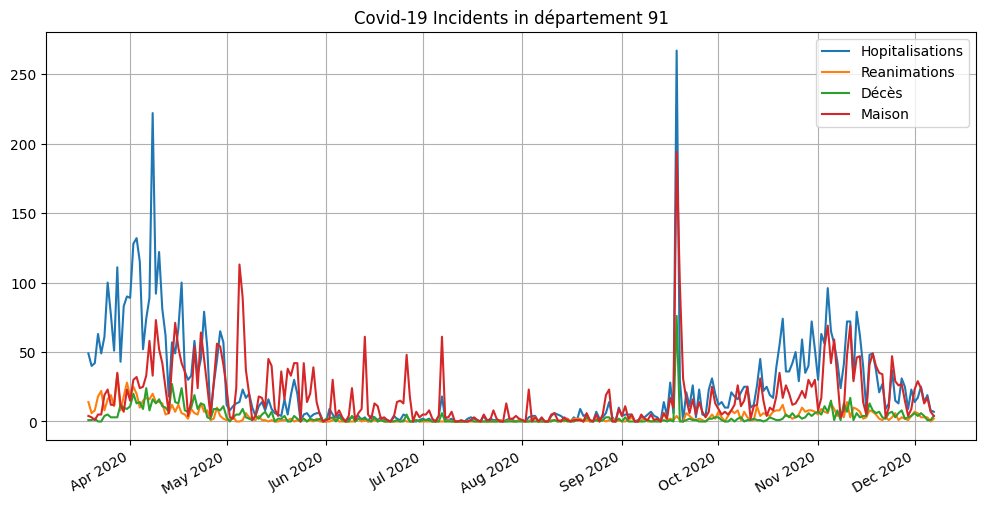

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

dep = '91'

data_plot = data[['dep', 'jour', 'incid_hosp', 'incid_rea', 'incid_dc', 'incid_rad']].copy()
data_plot = data_plot[data_plot.dep == dep]
data_plot['jour'] = pd.to_datetime(data_plot['jour'], format='%Y-%m-%d')
data_plot.set_index('jour', inplace=True)
data_plot = data_plot.sort_index()
# data_plot = data_plot.resample('D').sum()

plt.figure(figsize=(12, 6))
plt.plot(data_plot.index, data_plot['incid_hosp'], label='Hopitalisations')
plt.plot(data_plot.index, data_plot['incid_rea'], label='Reanimations')
plt.plot(data_plot.index, data_plot['incid_dc'], label='Décès')
plt.plot(data_plot.index, data_plot['incid_rad'], label='Maison')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format as "Mar 2020" etc
plt.gcf().autofmt_xdate()  


plt.title(f'Covid-19 Incidents in département {dep}')
plt.grid(True)
plt.legend()
plt.show()